# start section

In [ ]:

from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rmhysn","key":"3bcaab1c058b7f8e2f071f88ffac3f12"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d chrisfilo/urbansound8k


Dataset URL: https://www.kaggle.com/datasets/chrisfilo/urbansound8k
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 5.60G/5.61G [01:13<00:00, 89.9MB/s]
100% 5.61G/5.61G [01:13<00:00, 81.7MB/s]


In [ ]:
!unzip urbansound8k.zip -d ./UrbanSound8K


Streaming output truncated to the last 5000 lines.
  inflating: ./UrbanSound8K/fold4/151877-5-1-0.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-0.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-1.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-10.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-11.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-12.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-13.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-14.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-15.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-16.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-17.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-18.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-19.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-2.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-20.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-21.wav  
  inflating: ./UrbanSound8K/fold4/154758-5-0-3.wav  
  inflating: ./UrbanSound8K/fold4/15

In [ ]:
import tensorflow as tf

# Ensure that the GPU is available
print("Is GPU available: ", tf.config.list_physical_devices('GPU'))

# Enable memory growth for the GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Is GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!pip install librosa

In [ ]:

!pip install resampy

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename='/content/sound.wav'

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
!dir

100263-2-0-3.wav  sample_data  UrbanSound8K	 urbansound8k.zip
kaggle.json	  sound.wav    UrbanSound8K.csv


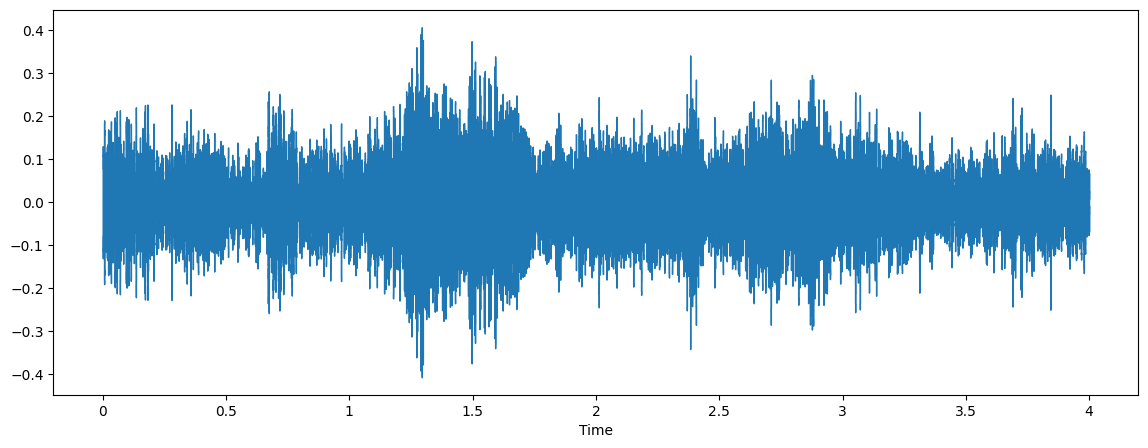

In [ ]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:

!pip install resampy


In [ ]:
sample_rate


22050

In [ ]:

from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [ ]:
wave_sample_rate

44100

In [ ]:
wave_audio

array([[ 897, -137],
       [1284,  380],
       [1641,  909],
       ...,
       [2319, 1655],
       [2411, 1806],
       [2464, 1941]], dtype=int16)

In [ ]:
data

array([0.010907  , 0.03923703, 0.06046733, ..., 0.05256338, 0.05524454,
       0.06829165], dtype=float32)

In [ ]:

import pandas as pd

metadata=pd.read_csv('/content/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing  
class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64


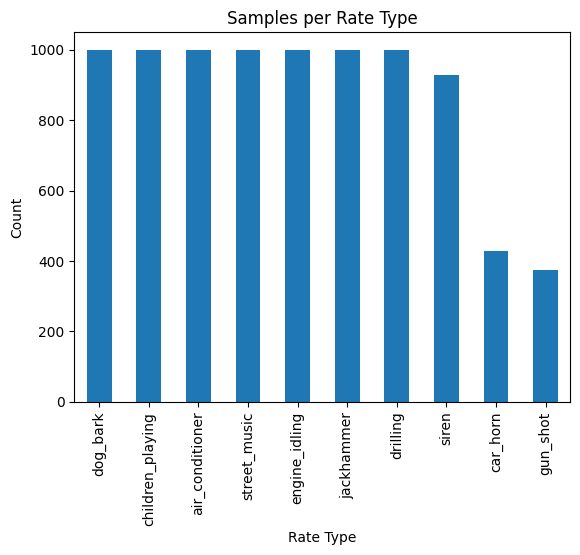

In [ ]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your file path)
data = pd.read_csv('/content/UrbanSound8K.csv')

# Check the first few rows to understand the structure of your data
print(data.head())

# Count the number of samples per rate or label type
rate_counts = data['class'].value_counts()  # Replace 'rate' with your column name
print(rate_counts)

# Optional: Visualize the counts as a bar chart
import matplotlib.pyplot as plt

rate_counts.plot(kind='bar', title='Samples per Rate Type', xlabel='Rate Type', ylabel='Count')
plt.show()


In [ ]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

,count
class,
dog_bark,1000
children_playing,1000
air_conditioner,1000
street_music,1000
engine_idling,1000
jackhammer,1000
drilling,1000
siren,929
car_horn,429


In [ ]:
### Let's read a sample audio using librosa
import librosa
import resampy
audio_file_path='/content/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:

print(librosa_audio_data)

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


# rectangular

In [ ]:
import librosa
import numpy as np
import scipy.fftpack  # For DCT
import os
import pandas as pd
from tqdm import tqdm

# Feature extraction function using rectangular window
def features_extractor_rectangular(file, frame_size=2048, hop_length=512, n_mfcc=40):
    try:
        # Load the audio file
        audio, sample_rate = librosa.load(file, res_type='kaiser_fast')

        # Framing and windowing with a rectangular window (all ones)
        frames = librosa.util.frame(audio, frame_length=frame_size, hop_length=hop_length).T
        window = np.ones(frame_size)  # Rectangular window (all ones)
        windowed_frames = frames * window

        # Fourier Transform
        dft = np.fft.rfft(windowed_frames, axis=1)
        magnitude = np.abs(dft)

        # Mel Filterbank
        mel_filters = librosa.filters.mel(sr=sample_rate, n_fft=frame_size, n_mels=n_mfcc)
        mel_energies = np.dot(mel_filters, magnitude.T).T

        # Log Compression
        log_mel = np.log(mel_energies + 1e-6)

        # DCT to compute MFCC
        mfccs = scipy.fftpack.dct(log_mel, axis=1, norm='ortho')[:, :n_mfcc]

        # Compute delta and delta-delta features
        delta_mfccs = librosa.feature.delta(mfccs, order=1)
        delta2_mfccs = librosa.feature.delta(mfccs, order=2)

        # Combine MFCCs with delta features
        mfccs_combined = np.vstack((mfccs, delta_mfccs, delta2_mfccs))

        # Return frame-level features
        return mfccs_combined
    except Exception as e:
        print(f"Error processing {file}: {e}")
        return None

# Padding or truncating function
def pad_or_truncate(features, target_length):
    """
    Ensure all features have the same number of frames (rows).
    If the input is shorter than target_length, pad with zeros.
    If it's longer, truncate to target_length.
    """
    num_frames, num_features = features.shape
    if num_frames < target_length:
        # Pad with zeros
        padding = np.zeros((target_length - num_frames, num_features))
        features = np.vstack((features, padding))
    elif num_frames > target_length:
        # Truncate to target_length
        features = features[:target_length, :]
    return features

# Feature extraction wrapper function
def extract_features_with_rectangular(file_name, target_length=128):
    try:
        # Extract raw features using rectangular window
        features = features_extractor_rectangular(file_name)
        if features is not None:
            print("Before padding/truncation:", features.shape)
            # Pad or truncate features to a fixed length
            features = pad_or_truncate(features, target_length=target_length)
            print("After padding/truncation:", features.shape)
        return features
    except Exception as e:
        print(f"Error processing {file_name}: {e}")
        return None



In [ ]:
import os
import pandas as pd
from tqdm import tqdm
import numpy as np

# Path to metadata and audio dataset
metadata_path = '/content/UrbanSound8K.csv'  # Update this to the actual path
audio_dataset_path = '/content/UrbanSound8K'  # Update this to the actual path

# Load metadata
metadata = pd.read_csv(metadata_path)

# Initialize an empty list to store extracted features
extracted_features = []

# Feature extraction using the features_extractor_blackmanharris function
def extract_features_with_rectangular(file_name):
    try:
        features = features_extractor_rectangular(file_name)
        return features
    except Exception as e:
        print(f"Error processing {file_name}: {e}")
        return None

#val =0

# Process each audio file listed in the metadata
for index_num, row in tqdm(metadata.iterrows(), total=metadata.shape[0]):
    # Construct the full file path
    file_name = os.path.join(
        os.path.abspath(audio_dataset_path),
        f'fold{row["fold"]}',
        row["slice_file_name"]
    )

    # Get the class label for the audio file
    final_class_labels = row["class"]

    # Extract features using Blackman-Harris window
    features =extract_features_with_rectangular(file_name)
   # print("before:")
    #print(features.shape)
    # Ensure valid features were extracted
    if features is not None:
        # Pad or truncate features to a fixed number of frames
        features = pad_or_truncate(features, target_length=128)
       # print("after:")
       # print(features.shape)

    data = features

    # # Append the extracted features and corresponding label
    if data is not None and data.size > 0:  # Ensure valid features
        extracted_features.append([data, final_class_labels])

        # Append the extracted features and corresponding label
#         extracted_features.append([features, final_class_labels])

# # After the loop, check if any features were extracted
# if len(extracted_features) > 0:
#     # Convert the extracted features into a DataFrame
#     extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])

#     print("Features extraction completed successfully.")
# else:
#     print("No features were extracted. Please check the dataset and extraction function.")


 41%|████      | 3557/8732 [05:54<06:23, 13.49it/s]

Error processing /content/UrbanSound8K/fold2/17307-1-0-0.wav: Input is too short (n=1323) for frame_length=2048


 95%|█████████▌| 8333/8732 [13:11<00:14, 27.06it/s]

Error processing /content/UrbanSound8K/fold1/87275-1-1-0.wav: Input is too short (n=1103) for frame_length=2048
Error processing /content/UrbanSound8K/fold1/87275-1-2-0.wav: Input is too short (n=1103) for frame_length=2048
Error processing /content/UrbanSound8K/fold1/87275-1-3-0.wav: Input is too short (n=1323) for frame_length=2048
Error processing /content/UrbanSound8K/fold1/87275-1-4-0.wav: Input is too short (n=1523) for frame_length=2048


100%|██████████| 8732/8732 [13:48<00:00, 10.54it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[[-9.062244314712883, 5.521566981213981, -7.66...",dog_bark
1,"[[-33.35768848302294, 6.710787979210094, -1.66...",children_playing
2,"[[-34.72902447059345, 7.233152911264829, -1.93...",children_playing
3,"[[-30.406984999395455, 5.837153686695606, -3.2...",children_playing
4,"[[-32.67595304893685, 6.884035968600681, -2.71...",children_playing


In [ ]:
extracted_features_df['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:

X.shape

(8727, 128, 40)

In [ ]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[[-1.46949372e+01, -3.02343630e+00, -7.89284102e+00, ...,
         -3.81774526e-01,  1.74174592e-01,  8.80361874e-02],
        [-1.37615492e+01, -6.29490104e+00, -8.32480277e+00, ...,
         -1.53393873e-01,  1.21707377e-01,  2.94672239e-02],
        [-1.25226355e+01, -5.38142577e+00, -8.66985886e+00, ...,
         -3.90200762e-01, -3.55782193e-02, -1.24195689e-01],
        ...,
        [ 2.31365281e+00,  2.31365281e+00,  2.31365281e+00, ...,
         -1.41538217e-02, -1.41538217e-02, -1.41538217e-02],
        [ 2.37238116e+00,  2.37238116e+00,  2.37238116e+00, ...,
         -3.04711180e-02, -3.04711180e-02, -3.04711180e-02],
        [ 2.45980287e+00,  2.45980287e+00,  2.45980287e+00, ...,
         -2.09114079e-02, -2.09114079e-02, -2.09114079e-02]],

       [[-1.12127531e+01, -9.82343885e-01,  4.59185766e-01, ...,
         -2.35371585e-01, -6.92725331e-02, -2.15119479e-01],
        [-1.08696315e+01, -9.26059313e-01,  4.32166283e-01, ...,
         -3.14029677e-01, -2.64883396e

In [ ]:
X_train.shape

(6981, 128, 40)

In [ ]:
X_test.shape

(1746, 128, 40)

In [ ]:
y_train.shape

(6981, 10)

In [ ]:
y_test.shape

(1746, 10)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [ ]:
print(metadata.columns)


Index(['slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold',
       'classID', 'class'],
      dtype='object')


In [ ]:
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
print(audio.shape)


(55787,)


In [ ]:

print(X_train.shape)


(6981, 128, 40)


In [ ]:

print(X_test.shape)


(1746, 128, 40)


In [ ]:
### Number of classes
num_labels = y_train.shape[1]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1803 - loss: 2.1783
Epoch 1: val_loss improved from inf to 1.65725, saving model to models/audio_classification_bilstm_64_relu.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.1806 - loss: 2.1776 - val_accuracy: 0.4049 - val_loss: 1.6572
Epoch 2/50
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3491 - loss: 1.7428
Epoch 2: val_loss improved from 1.65725 to 1.31306, saving model to models/audio_classification_bilstm_64_relu.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.3495 - loss: 1.7421 - val_accuracy: 0.5258 - val_loss: 1.3131
Epoch 3/50
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4861 - loss: 1.4634
Epoch 3: val_loss improved from 1.31306 to 1.23957, saving model to models/audio_classification_bilstm_64_relu.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4862 - loss: 1.4631 - val_accuracy: 0.5790 - val_loss: 1.2396
Epoch 4/50
217/219 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2569 - loss: 2.0186
Epoch 1: val_loss improved from inf to 1.29601, saving model to models/audio_classification_bilstm_64_tanh.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.2573 - loss: 2.0176 - val_accuracy: 0.5664 - val_loss: 1.2960
Epoch 2/50
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5262 - loss: 1.4069
Epoch 2: val_loss improved from 1.29601 to 1.09137, saving model to models/audio_classification_bilstm_64_tanh.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.5264 - loss: 1.4063 - val_accuracy: 0.6352 - val_loss: 1.0914
Epoch 3/50
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5935 - loss: 1.1976
Epoch 3: val_loss improved from 1.09137 to 0.91539, saving model to models/audio_classification_bilstm_64_tanh.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5938 - loss: 1.1971 - val_accuracy: 0.6970 - val_loss: 0.9154
Epoch 4/50
217/219 ━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1959 - loss: 2.1187
Epoch 1: val_loss improved from inf to 1.53797, saving model to models/audio_classification_bilstm_64_leaky_relu.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.1969 - loss: 2.1164 - val_accuracy: 0.4507 - val_loss: 1.5380
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3669 - loss: 1.6974
Epoch 2: val_loss improved from 1.53797 to 1.32789, saving model to models/audio_classification_bilstm_64_leaky_relu.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.3671 - loss: 1.6970 - val_accuracy: 0.5212 - val_loss: 1.3279
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5054 - loss: 1.4208
Epoch 3: val_loss improved from 1.32789 to 1.17189, saving model to models/audio_classification_bilstm_64_leaky_relu.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5055 - loss: 1.4207 - val_accuracy: 0.5911 - val_loss: 1.1719
Epoch 4/50
217/219

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.1975 - loss: 2.0986
Epoch 1: val_loss improved from inf to 1.45131, saving model to models/audio_classification_bilstm_128_relu.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.1982 - loss: 2.0970 - val_accuracy: 0.4868 - val_loss: 1.4513
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4269 - loss: 1.5986
Epoch 2: val_loss improved from 1.45131 to 1.42200, saving model to models/audio_classification_bilstm_128_relu.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.4270 - loss: 1.5984 - val_accuracy: 0.4920 - val_loss: 1.4220
Epoch 3/50
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4928 - loss: 1.4364
Epoch 3: val_loss improved from 1.42200 to 1.13444, saving model to models/audio_classification_bilstm_128_relu.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.4932 - loss: 1.4357 - val_accuracy: 0.6094 - val_loss: 1.1344
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2850 - loss: 1.9964
Epoch 1: val_loss improved from inf to 1.31146, saving model to models/audio_classification_bilstm_128_tanh.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.2858 - loss: 1.9942 - val_accuracy: 0.5281 - val_loss: 1.3115
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5162 - loss: 1.3887
Epoch 2: val_loss improved from 1.31146 to 1.06408, saving model to models/audio_classification_bilstm_128_tanh.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.5163 - loss: 1.3884 - val_accuracy: 0.6443 - val_loss: 1.0641
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6177 - loss: 1.1702
Epoch 3: val_loss improved from 1.06408 to 0.92735, saving model to models/audio_classification_bilstm_128_tanh.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.6177 - loss: 1.1700 - val_accuracy: 0.7050 - val_loss: 0.9273
Epoch 4/50
218/219 ━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2406 - loss: 2.0434
Epoch 1: val_loss improved from inf to 1.41359, saving model to models/audio_classification_bilstm_128_leaky_relu.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.2413 - loss: 2.0417 - val_accuracy: 0.5006 - val_loss: 1.4136
Epoch 2/50
218/219 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4640 - loss: 1.5153
Epoch 2: val_loss improved from 1.41359 to 1.18150, saving model to models/audio_classification_bilstm_128_leaky_relu.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.4643 - loss: 1.5148 - val_accuracy: 0.5968 - val_loss: 1.1815
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5706 - loss: 1.2957
Epoch 3: val_loss improved from 1.18150 to 1.07305, saving model to models/audio_classification_bilstm_128_leaky_relu.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5706 - loss: 1.2956 - val_accuracy: 0.6346 - val_loss: 1.0730
Epoch 4/50
219/

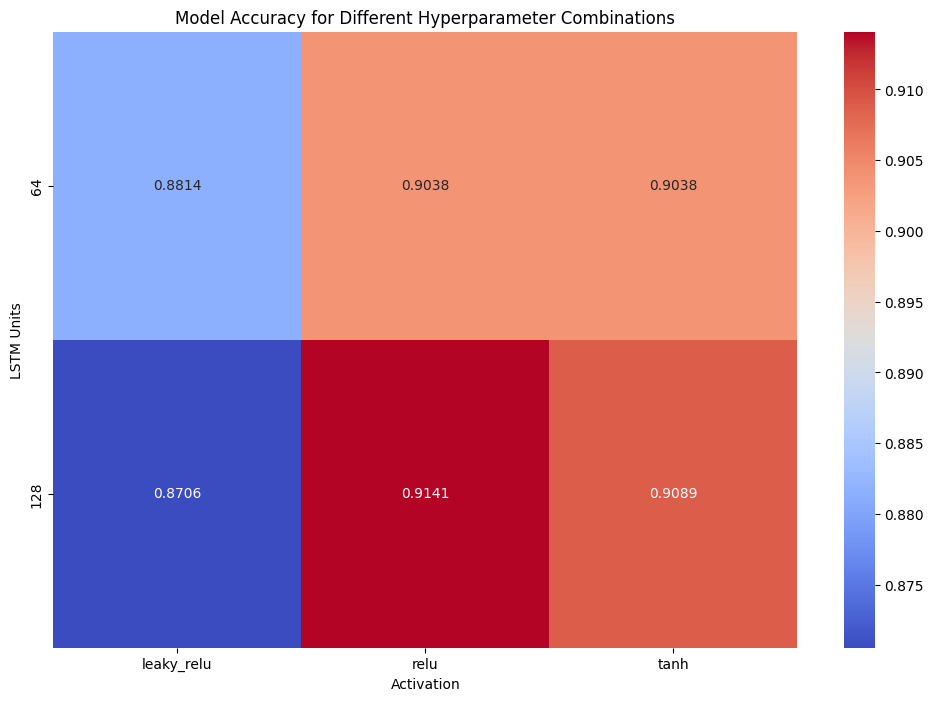

Best Model Details: {'LSTM Units': 128, 'Activation': 'relu', 'Accuracy': 0.9140893470790378, 'Precision': 0.91665333456548, 'F1 Score': 0.9137981282107461, 'Specificity': 0.9902776118955975}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LeakyReLU
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

# Define fixed hyperparameters
dropout = 0.5  # Fixed dropout rate
learning_rate = 0.001  # Fixed learning rate

# Hyperparameters to search over
lstm_units = [64, 128]  # Reduced number of units
activations = ['relu', 'tanh', 'leaky_relu']  # Reduced to 3 activation functions

# Store results in a list
results = []

# Number of epochs and batch size
num_epochs = 50  # Reduced epochs for faster experimentation
num_batch_size = 32

# Variable to track the best model
best_model = None
best_accuracy = 0
best_model_details = {}

# Loop over LSTM units and activation functions
for units in lstm_units:
    for activation in activations:

        # Early stopping to avoid overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

        # Define the model
        model = Sequential()

        # First Bidirectional LSTM layer
        model.add(Bidirectional(LSTM(units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)))

        # Handle different activation functions
        if activation == 'leaky_relu':
            model.add(LeakyReLU(alpha=0.1))  # Custom activation
        else:
            model.add(Activation(activation))  # Built-in activation like 'relu', 'tanh'

        model.add(Dropout(dropout))

        # Second Bidirectional LSTM layer
        model.add(Bidirectional(LSTM(units, return_sequences=False)))

        # Apply the same activation function for the second layer
        if activation == 'leaky_relu':
            model.add(LeakyReLU(alpha=0.1))
        else:
            model.add(Activation(activation))

        model.add(Dropout(dropout))

        # Dense layer
        model.add(Dense(64))
        if activation == 'leaky_relu':
            model.add(LeakyReLU(alpha=0.1))
        else:
            model.add(Activation(activation))

        model.add(Dropout(dropout))

        # Final classification layer
        model.add(Dense(num_labels))
        model.add(Activation('softmax'))

        # Compile the model with the current learning rate
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

        # Define ModelCheckpoint to save the best model during training
        checkpointer = ModelCheckpoint(filepath=f'models/audio_classification_bilstm_{units}_{activation}.keras',
                                       verbose=1, save_best_only=True)

        # Track the start time of training
        start = datetime.now()

        # Train the model with early stopping and checkpoint
        history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test),
                            callbacks=[early_stopping, checkpointer], verbose=1)

        # Track the duration of the training
        duration = datetime.now() - start
        print(f"Training completed in: {duration}")

        # Make predictions on the test set
        predictions = model.predict(X_test)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(y_test, axis=1)

        # Confusion Matrix
        conf_matrix = confusion_matrix(true_classes, predicted_classes)

        # Calculate precision, recall, F1 score, and specificity for each class
        precision = precision_score(true_classes, predicted_classes, average='weighted')
        f1 = f1_score(true_classes, predicted_classes, average='weighted')
        recall = recall_score(true_classes, predicted_classes, average='weighted')

        # Specificity calculation (True Negative Rate)
        specificity_per_class = []
        for i in range(len(conf_matrix)):
            tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
            fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            specificity_per_class.append(specificity)

        avg_specificity = np.mean(specificity_per_class)

        print(f"Confusion Matrix:\n{conf_matrix}")
        print(f"Precision: {precision:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"Average Specificity: {avg_specificity:.4f}")

        # Append the results to the list
        results.append({
            'LSTM Units': units,
            'Activation': activation,
            'Accuracy': recall,
            'Precision': precision,
            'F1 Score': f1,
            'Specificity': avg_specificity,
            'Training Time': str(duration)
        })

        # If this model has the best accuracy so far, store its details
        if recall > best_accuracy:
            best_accuracy = recall
            best_model = model
            best_model_details = {
                'LSTM Units': units,
                'Activation': activation,
                'Accuracy': recall,
                'Precision': precision,
                'F1 Score': f1,
                'Specificity': avg_specificity
            }

# Convert the results to a pandas DataFrame
df_results = pd.DataFrame(results)

# Print the results in a table format
print(df_results)

# Plot the results using seaborn to visualize them better
plt.figure(figsize=(12, 8))

# Pivot table for visualization
pivot_table = df_results.pivot_table(index="LSTM Units", columns="Activation", values="Accuracy", aggfunc='mean')

# Heatmap visualization
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="coolwarm")
plt.title("Model Accuracy for Different Hyperparameter Combinations")
plt.show()

# Print the best model details
print(f"Best Model Details: {best_model_details}")


In [ ]:
import numpy as np

# List of class labels (ensure it matches the number of classes in your model)
class_labels = [
    'dog_bark',
    'children_playing',
    'car_horn',
    'air_conditioner',
    'street_music',
    'gun_shot',
    'siren',
    'engine_idling',
    'jackhammer',
    'drilling'
]

# Select the first 12 samples from X_test and y_test
X_test_subset = X_test[:12]
y_test_subset = y_test[:12]

# Convert y_test from one-hot encoding to class indices for the subset
true_labels_subset = np.argmax(y_test_subset, axis=1)

# Make predictions on the subset of test data
predictions_subset = best_model.predict(X_test_subset)
predicted_classes_subset = np.argmax(predictions_subset, axis=1)

# Print the original class labels and predicted labels
print("Original Class vs Predicted Class for the first 12 samples:")
for i in range(len(X_test_subset)):
    original_class = class_labels[true_labels_subset[i]]
    predicted_class = class_labels[predicted_classes_subset[i]]
    print(f"Sample {i+1}: Original Class = {original_class}, Predicted Class = {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Original Class vs Predicted Class for the first 12 samples:
Sample 1: Original Class = jackhammer, Predicted Class = jackhammer
Sample 2: Original Class = air_conditioner, Predicted Class = air_conditioner
Sample 3: Original Class = car_horn, Predicted Class = jackhammer
Sample 4: Original Class = jackhammer, Predicted Class = car_horn
Sample 5: Original Class = drilling, Predicted Class = drilling
Sample 6: Original Class = air_conditioner, Predicted Class = air_conditioner
Sample 7: Original Class = gun_shot, Predicted Class = gun_shot
Sample 8: Original Class = air_conditioner, Predicted Class = air_conditioner
Sample 9: Original Class = drilling, Predicted Class = drilling
Sample 10: Original Class = drilling, Predicted Class = drilling
Sample 11: Original Class = dog_bark, Predicted Class = dog_bark
Sample 12: Original Class = car_horn, Predicted Class = drilling
